<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Practical 1 - Tensor Operations</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

## Objectives
After completing this practical exercise, students should be able to:
1. [Understand how the data is represented using tensors](#rep)
2. [Understand the basics of tensor operations](#ops)
3. [Exercise: provide your own examples](#exc)


## 1. Data Representations <a id='rep' />
All current machine-learning systems use tensors as their basic data structure. A tensor is a container for data, almost always numeric data. 

### 1.1 Scalars (0D tensors)
A tensor that contains only one number.

In [1]:
import numpy as np
x = np.array(12)
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 12 

The dimension of x is:  0
The shape of x is:  ()


### 1.2 Vectors (1D tensors)
An array of numbers.

In [2]:
x = np.array([12,3,6,14,25])
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 [12  3  6 14 25] 

The dimension of x is:  1
The shape of x is:  (5,)


This vector has five entries and so it is a 5-dimensional vector (5D vector), but a 1D tensor. 

### 1.3 Matrices (2D tensors)
An array of vectors.

In [3]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] 

The dimension of x is:  2
The shape of x is:  (3, 5)


### 1.4 3D tensors and higher-dimentional tensors
Pack matrices into a new array. 

In [4]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print('x = \n', x)
print('\nThe dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]

The dimension of x is:  3
The shape of x is:  (3, 3, 5)


### 1.5 Key attributes
* Number of axes (rank or dimension): ndim in Numpy
* Shape: how many dimensions the tensor has along each axis
* Data type: dtype in Python. The type of the data contained in the tensor

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(train_images.ndim)

3


In [7]:
print(train_images.shape)

(60000, 28, 28)


In [8]:
print(train_images.dtype)

uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255. Let’s display the fourth digit in this 3D tensor, using the library Matplotlib.

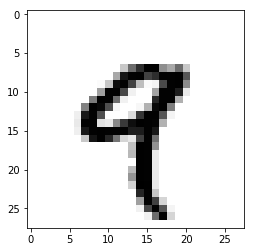

In [9]:
digit = train_images[4]
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
#print(digit)

### 1.6 Tensor Slicing
Selecting specific elements in a tensor

In [10]:
#Select digits #10 to #100 (#100 isn't included)
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [11]:
#Select digits #10 to #100 (#100 isn't included)
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [12]:
#Select digits #10 to #100 (#100 isn't included)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [13]:
#Select 14x14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [14]:
#Crop the images to patches of 14x14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


Deep-learning models don’t process an entire dataset at once; they break the data into small batches. Here’s one batch of our MNIST digits, with batch size of 128:

In [15]:
batch = train_images[:128] # 1st batch
batch = train_images[128:256] # 2nd batch

# the nth batch
n=10
batch = train_images[128 * n:128 * (n + 1)]
print(batch.shape)

(128, 28, 28)


When considering such a batch tensor, the first axis (axis 0) is called the batch axis or
batch dimension.

## 2. Tensor Operations <a id='ops' />
All transformations learned by deep neural networks can be reduced to a handful of tensor operations applied to tensors of numeric data, e.g. add tensors, multiply tensors and etc.

### 2.1 Element-wise operations
Operations that are applied independently to each entry in the tensors.

In [16]:
import numpy as np
print('x is: \n', x)
#Element-wise substraction
print("\n==Element-wise substraction==")
print('{:^28}'.format("y = x - 4"))
y = x - 4 
print('y is: \n', y)

#Element-wise addition
print("\n==Element-wise addition==")
print('{:^28}'.format("z = x + y"))
z = x + y
print('z is: \n', z)

#Element-wise relu
print("\n==Element-wise relu==")
z2 = np.maximum(z, 0.)
print('z2 is: \n', z2)

x is: 
 [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]

==Element-wise substraction==
         y = x - 4          
y is: 
 [[[ 1 74 -2 30 -4]
  [ 2 75 -1 31 -3]
  [ 3 76  0 32 -2]]

 [[ 1 74 -2 30 -4]
  [ 2 75 -1 31 -3]
  [ 3 76  0 32 -2]]

 [[ 1 74 -2 30 -4]
  [ 2 75 -1 31 -3]
  [ 3 76  0 32 -2]]]

==Element-wise addition==
         z = x + y          
z is: 
 [[[  6 152   0  64  -4]
  [  8 154   2  66  -2]
  [ 10 156   4  68   0]]

 [[  6 152   0  64  -4]
  [  8 154   2  66  -2]
  [ 10 156   4  68   0]]

 [[  6 152   0  64  -4]
  [  8 154   2  66  -2]
  [ 10 156   4  68   0]]]

==Element-wise relu==
z2 is: 
 [[[  6. 152.   0.  64.   0.]
  [  8. 154.   2.  66.   0.]
  [ 10. 156.   4.  68.   0.]]

 [[  6. 152.   0.  64.   0.]
  [  8. 154.   2.  66.   0.]
  [ 10. 156.   4.  68.   0.]]

 [[  6. 152.   0.  64.   0.]
  [  8. 154.   2.  66.   0.]
  [ 10. 156.   4

### 2.2 Broadcasting
When the shapes of two tensors being added are different, if there's no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor.

In [17]:
import numpy as np
#Generate random numbers from 0 to 9 into a 3 x 2 x 5 array
x = np.random.randint(10, size=(3, 2, 5))
print('x is: \n', x, '\n')
y = np.random.randint(10, size=(2, 5))
print('y is: \n', y, '\n')
z = x + y
print('z is: \n', z)

x is: 
 [[[5 5 5 6 5]
  [4 9 7 1 6]]

 [[7 6 2 4 8]
  [6 0 0 7 9]]

 [[3 0 9 0 0]
  [8 6 7 6 9]]] 

y is: 
 [[8 2 9 5 4]
 [0 5 4 0 7]] 

z is: 
 [[[13  7 14 11  9]
  [ 4 14 11  1 13]]

 [[15  8 11  9 12]
  [ 6  5  4  7 16]]

 [[11  2 18  5  4]
  [ 8 11 11  6 16]]]


### 2.3 Tensor dot
The dot operations, also called tensor product, is very similiar to vector/matrix multiplication. 

In [18]:
import numpy as np
x = np.random.randint(10, size=(2, 5))
print('x is: \n', x, '\n')
y = np.random.randint(10, size=(5, 3))
print('y is: \n', y, '\n')
z = np.dot(x, y)
print('z is: \n', z)

x is: 
 [[3 7 1 9 0]
 [6 8 3 3 0]] 

y is: 
 [[6 0 1]
 [4 5 9]
 [0 0 6]
 [7 2 8]
 [9 5 5]] 

z is: 
 [[109  53 144]
 [ 89  46 120]]


In [19]:
#element wise multiply
x = np.random.randint(10, size=(2, 5))
print('x is: \n', x, '\n')
y = np.random.randint(10, size=(2, 5))
print('y is: \n', y, '\n')
z = x*y
print('z is: \n', z)

x is: 
 [[1 4 6 0 5]
 [3 1 2 7 9]] 

y is: 
 [[4 4 8 2 8]
 [8 0 9 2 1]] 

z is: 
 [[ 4 16 48  0 40]
 [24  0 18 14  9]]


### 2.4 Tensor reshaping
Rearranging the rows and columns of a tensor to match a target shape.

In [20]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x, '\n')
print('The shape of x is:', x.shape)

[[0. 1.]
 [2. 3.]
 [4. 5.]] 

The shape of x is: (3, 2)


In [21]:
x.dtype

dtype('float64')

In [22]:
x = x.reshape((6, 1))
print(x, '\n')
print('The shape of x is:', x.shape)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] 

The shape of x is: (6, 1)


A special case of reshaping that’s commonly encountered is transposition.

In [23]:
y = np.zeros((3, 2))
print('y is: \n', y, '\n')
print('The shape of y is:', y.shape,'\n')
y_t = np.transpose(y)
print('y_t is: \n', y_t, '\n')
print('The shape of y_t is:', y_t.shape,'\n')

y is: 
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 

The shape of y is: (3, 2) 

y_t is: 
 [[0. 0. 0.]
 [0. 0. 0.]] 

The shape of y_t is: (2, 3) 



## 3. Exercise <a id='exc' />

1. Provide an example of 0D tensor, 1D tensor, 2D tensor and 3D tensor respectively.

In [45]:
#Task 1: 0D tensor
import numpy as np
x = np.array(1)
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 1 

The dimension of x is:  0
The shape of x is:  ()


In [47]:
#Task 2: 1D tensor
x = np.array([1,2,3,4])
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 [1 2 3 4] 

The dimension of x is:  1
The shape of x is:  (4,)


In [48]:
#Task 3: 2D tensor
x = np.array([[1,2,3,4],
            [5,6,7,8,],
            [9,10,11,12]])
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

The dimension of x is:  2
The shape of x is:  (3, 4)


In [51]:
#Task 4: 3D tensor
x = np.array([[[1,1,1],[2,2,2],[3,3,3],[4,4,4]],
              [[5,5,5],[6,6,6],[7,7,7],[8,8,8]],
              [[9,9,9],[10,10,10],[11,11,11],[12,12,12]]])
print('x = \n', x, '\n')
print('The dimension of x is: ', x.ndim)
print('The shape of x is: ', x.shape)

x = 
 [[[ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[ 9  9  9]
  [10 10 10]
  [11 11 11]
  [12 12 12]]] 

The dimension of x is:  3
The shape of x is:  (3, 4, 3)


2. Provide a Tensor Slicing Example. 

In [63]:
# Task 1: Tensor Slicing
x = np.random.randint(10, size=(3, 5))
print('x is: \n', x)

print('\nSliced x is: \n', x[1:,2:])

x is: 
 [[5 9 3 6 8]
 [5 2 4 1 3]
 [6 7 4 2 7]]

Sliced x is: 
 [[4 1 3]
 [4 2 7]]


3. Provide an example for each tensor operation learnt in this Practical.

In [65]:
# Task 1: Element Wise Operation
x = np.random.randint(10, size=(3, 2, 5))
y = np.random.randint(10, size=(3, 2, 5))
#Element-wise substraction
y = x - 4 
print('y is: \n', y)

#Element-wise addition
z = x + y
print('\nz is: \n', z)

#Element-wise relu
z2 = np.maximum(z, 0.)
print('\nz2 is: \n', z2)

y is: 
 [[[-4  3  1  1  1]
  [ 2 -2 -1  1 -4]]

 [[-1  5  2  5  3]
  [ 5  3  0 -2  1]]

 [[-4 -1  3 -2  1]
  [ 3  1  4 -3 -1]]]

z is: 
 [[[-4 10  6  6  6]
  [ 8  0  2  6 -4]]

 [[ 2 14  8 14 10]
  [14 10  4  0  6]]

 [[-4  2 10  0  6]
  [10  6 12 -2  2]]]

z2 is: 
 [[[ 0. 10.  6.  6.  6.]
  [ 8.  0.  2.  6.  0.]]

 [[ 2. 14.  8. 14. 10.]
  [14. 10.  4.  0.  6.]]

 [[ 0.  2. 10.  0.  6.]
  [10.  6. 12.  0.  2.]]]


In [68]:
# Task 2: Broadcasting
x = np.random.randint(10, size=(4, 2, 5))
print('x is: \n', x, '\n')
y = np.random.randint(10, size=(2, 5))
print('y is: \n', y, '\n')
z = x + y
print('x + y is: \n', z)

x is: 
 [[[3 0 5 1 2]
  [0 9 5 3 7]]

 [[1 3 7 8 0]
  [3 6 0 6 0]]

 [[1 5 4 5 0]
  [0 5 3 3 0]]

 [[1 5 3 4 9]
  [7 7 8 8 5]]] 

y is: 
 [[0 2 7 5 1]
 [3 9 9 0 4]] 

x + y is: 
 [[[ 3  2 12  6  3]
  [ 3 18 14  3 11]]

 [[ 1  5 14 13  1]
  [ 6 15  9  6  4]]

 [[ 1  7 11 10  1]
  [ 3 14 12  3  4]]

 [[ 1  7 10  9 10]
  [10 16 17  8  9]]]


In [66]:
# Task 3: Tensor Dot
x = np.random.randint(10, size=(2, 4))
print('x is: \n', x, '\n')
y = np.random.randint(10, size=(4, 5))
print('y is: \n', y, '\n')
z = np.dot(x, y)
print('Tensor Dot:\nz is: \n', z)

x is: 
 [[7 1 0 7]
 [9 6 3 4]] 

y is: 
 [[8 4 7 2 3]
 [8 6 0 8 0]
 [5 8 2 0 5]
 [4 7 8 6 7]] 

Tensor Dot:
z is: 
 [[ 92  83 105  64  70]
 [151 124 101  90  70]]


In [78]:
# Task 4: Tensor Reshaping
x = np.random.randint(10, size=(2, 4))
print(x, '\n')
print('The original shape of x is:', x.shape,'\n')
x = x.reshape((4, 2))
print(x, '\n')
print('The re-shaped shape of x is:', x.shape)

[[9 1 8 1]
 [9 8 1 7]] 

The original shape of x is: (2, 4) 

[[9 1]
 [8 1]
 [9 8]
 [1 7]] 

The re-shaped shape of x is: (4, 2)
